## 1- Problem Definition: 
#### to analyse data related to covid-19 and gain insights

## 2- Data 
#### Downlaod dataset from:
https://ourworldindata.org/covid-cases
#### Data is in CSV format.

In [1]:
# import libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 3- load the data from csv file into a dataframe

In [41]:
df = pd.read_csv(r'C:\Users\ms\PycharmProjects\DS - karan\owid-covid-data.csv')

In [4]:
# display the dataframe

In [42]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,NaN,0.00,NaN,...,NaN,37.75,0.50,64.83,0.51,41128772.00,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365560,ZWE,Africa,Zimbabwe,2023-12-15,265975.00,0.00,0.00,5730.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
365561,ZWE,Africa,Zimbabwe,2023-12-16,265975.00,0.00,0.00,5730.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
365562,ZWE,Africa,Zimbabwe,2023-12-17,265975.00,0.00,0.00,5730.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN
365563,ZWE,Africa,Zimbabwe,2023-12-18,265975.00,0.00,0.00,5730.00,0.00,0.00,...,30.70,36.79,1.70,61.49,0.57,16320539.00,NaN,NaN,NaN,NaN


In [43]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# I don't need all of columns, therefor I filter them

In [44]:
df=df[['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'cardiovasc_death_rate', 'new_deaths', 'total_tests','new_tests']]

In [45]:
df

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,597.03,0.00,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,597.03,0.00,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,597.03,0.00,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,597.03,0.00,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,597.03,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
365560,ZWE,Africa,Zimbabwe,2023-12-15,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365561,ZWE,Africa,Zimbabwe,2023-12-16,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365562,ZWE,Africa,Zimbabwe,2023-12-17,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365563,ZWE,Africa,Zimbabwe,2023-12-18,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN


## 4- Data Expolation

In [9]:
# Row and column count

In [46]:
df.shape

(365565, 11)

In [11]:
# view the first few rows

In [47]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.00,NaN,597.03,0.00,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.00,NaN,597.03,0.00,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.00,NaN,597.03,0.00,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.00,NaN,597.03,0.00,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.00,NaN,597.03,0.00,NaN,NaN


In [13]:
# in the first sight, there is not enough infromation about the first days of 2020

In [14]:
# view the last few rows

In [48]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests
365560,ZWE,Africa,Zimbabwe,2023-12-15,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365561,ZWE,Africa,Zimbabwe,2023-12-16,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365562,ZWE,Africa,Zimbabwe,2023-12-17,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365563,ZWE,Africa,Zimbabwe,2023-12-18,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365564,ZWE,Africa,Zimbabwe,2023-12-19,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN


In [16]:
# check basic statistics for numeric columns

In [49]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [50]:
df.describe()

,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests
count,327216.00,355673.00,305512.00,283647.00,355720.00,79387.00,75403.00
mean,6993867.09,9208.80,87712.39,264.30,81.97,21104573.94,67285.41
std,42174362.17,107918.80,447193.20,120.90,623.05,84098694.31,247734.00
min,1.00,0.00,1.00,79.37,0.00,0.00,1.00
25%,8702.00,0.00,130.00,175.69,0.00,364654.00,2244.00
50%,73776.00,1.00,1361.00,245.47,0.00,2067330.00,8783.00
75%,809265.00,228.00,12031.00,333.44,2.00,10248451.50,37229.00
max,772837981.00,8401963.00,6988666.00,724.42,57167.00,9214000000.00,35855632.00


In [18]:
# check the concise summary of the DataFrame, including the data types and non-null counts of each column.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365565 entries, 0 to 365564
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   iso_code               365565 non-null  object 
 1   continent              348099 non-null  object 
 2   location               365565 non-null  object 
 3   date                   365565 non-null  object 
 4   total_cases            327216 non-null  float64
 5   new_cases              355673 non-null  float64
 6   total_deaths           305512 non-null  float64
 7   cardiovasc_death_rate  283647 non-null  float64
 8   new_deaths             355720 non-null  float64
 9   total_tests            79387 non-null   float64
 10  new_tests              75403 non-null   float64
dtypes: float64(7), object(4)
memory usage: 30.7+ MB


In [20]:
# Check for missing values - shows the total count of null values fo each column

In [52]:
df.isnull().sum()

iso_code                      0
continent                 17466
location                      0
date                          0
total_cases               38349
new_cases                  9892
total_deaths              60053
cardiovasc_death_rate     81918
new_deaths                 9845
total_tests              286178
new_tests                290162
dtype: int64

## 5. Data Cleaning

In [22]:
# first convert date column from object to date type

In [53]:
df['date'] = pd.to_datetime(df['date'])

C:\Users\ms\AppData\Local\Temp\ipykernel_2088\3532345252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [24]:
# clean the missing values

In [25]:
# continent: fill the missing values with map to country

In [54]:
'''!pip install country_converter'''

'!pip install country_converter'

In [55]:
'''import country_converter as coco

# Load the country converter data
coco = coco.CountryConverter()

# Example: Convert country names to continents
def get_continent(country):
    try:
        return coco.convert(names=country, to='continent')[0]
    except coco.exceptions.NotFittedError:
        # Handle the case when the converter is not fitted
        return None

# Apply the get_continent function to fill missing values in 'continent' column
df['continent'].fillna(df['location'].apply(get_continent), inplace=True)'''


"import country_converter as coco\n\n# Load the country converter data\ncoco = coco.CountryConverter()\n\n# Example: Convert country names to continents\ndef get_continent(country):\n    try:\n        return coco.convert(names=country, to='continent')[0]\n    except coco.exceptions.NotFittedError:\n        # Handle the case when the converter is not fitted\n        return None\n\n# Apply the get_continent function to fill missing values in 'continent' column\ndf['continent'].fillna(df['location'].apply(get_continent), inplace=True)"

In [56]:
df.isnull().sum()

iso_code                      0
continent                 17466
location                      0
date                          0
total_cases               38349
new_cases                  9892
total_deaths              60053
cardiovasc_death_rate     81918
new_deaths                 9845
total_tests              286178
new_tests                290162
dtype: int64

In [57]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,cardiovasc_death_rate,new_deaths,total_tests,new_tests
365560,ZWE,Africa,Zimbabwe,2023-12-15,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365561,ZWE,Africa,Zimbabwe,2023-12-16,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365562,ZWE,Africa,Zimbabwe,2023-12-17,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365563,ZWE,Africa,Zimbabwe,2023-12-18,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN
365564,ZWE,Africa,Zimbabwe,2023-12-19,265975.00,0.00,5730.00,307.85,0.00,NaN,NaN


In [ ]:
# total_cases

In [61]:
pd.set_option('display.expand_frame_repr', False)
missing_values_rows = df[df['total_cases'].isnull()]
print(missing_values_rows)

       iso_code continent     location       date  total_cases  new_cases  total_deaths  cardiovasc_death_rate  new_deaths  total_tests  new_tests
0           AFG      Asia  Afghanistan 2020-01-03          NaN       0.00           NaN                 597.03        0.00          NaN        NaN
1           AFG      Asia  Afghanistan 2020-01-04          NaN       0.00           NaN                 597.03        0.00          NaN        NaN
2           AFG      Asia  Afghanistan 2020-01-05          NaN       0.00           NaN                 597.03        0.00          NaN        NaN
3           AFG      Asia  Afghanistan 2020-01-06          NaN       0.00           NaN                 597.03        0.00          NaN        NaN
4           AFG      Asia  Afghanistan 2020-01-07          NaN       0.00           NaN                 597.03        0.00          NaN        NaN
...         ...       ...          ...        ...          ...        ...           ...                    ...        

In [ ]:
# the total_cases missing values are related to the first months of 2020, the best approach is to delete them.

In [62]:
df.dropna(subset=['total_cases'], inplace=True)

C:\Users\ms\AppData\Local\Temp\ipykernel_2088\1271523696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['total_cases'], inplace=True)


In [63]:
df.isnull().sum()

iso_code                      0
continent                 17146
location                      0
date                          0
total_cases                   0
new_cases                   288
total_deaths              21726
cardiovasc_death_rate     64302
new_deaths                  242
total_tests              249118
new_tests                252985
dtype: int64

In [ ]:
# total_deaths

In [64]:
missing_values_rows = df[df['cardiovasc_death_rate'].isnull()]
print(missing_values_rows)

        iso_code continent           location       date  total_cases  new_cases  total_deaths  cardiovasc_death_rate  new_deaths  total_tests  new_tests
1491    OWID_AFR       NaN             Africa 2020-02-16         1.00       1.00           NaN                    NaN        0.00          NaN        NaN
1492    OWID_AFR       NaN             Africa 2020-02-17         1.00       0.00           NaN                    NaN        0.00          NaN        NaN
1493    OWID_AFR       NaN             Africa 2020-02-18         1.00       0.00           NaN                    NaN        0.00          NaN        NaN
1494    OWID_AFR       NaN             Africa 2020-02-19         1.00       0.00           NaN                    NaN        0.00          NaN        NaN
1495    OWID_AFR       NaN             Africa 2020-02-20         1.00       0.00           NaN                    NaN        0.00          NaN        NaN
...          ...       ...                ...        ...          ...       

In [ ]:
# I want to compare diffrent country total deaths during the time, therefore I use total_deaths column - based on the suggestion I use the cardiovasc_death_rate which is the normilized total_death rate based on population
# Cumulative Impact & Long term trends

In [ ]:
# first remove the missing values in cardiovasc_death_rate

In [65]:
df.dropna(subset=['cardiovasc_death_rate'], inplace=True)

C:\Users\ms\AppData\Local\Temp\ipykernel_2088\1749942632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['cardiovasc_death_rate'], inplace=True)


In [66]:
df.isnull().sum()

iso_code                      0
continent                  1446
location                      0
date                          0
total_cases                   0
new_cases                   279
total_deaths              11865
cardiovasc_death_rate         0
new_deaths                  238
total_tests              185833
new_tests                189466
dtype: int64

In [67]:
# Group by country and calculate the total deaths for each country
total_deaths_by_country = df.groupby('location')['cardiovasc_death_rate'].sum().reset_index()

# Sort the DataFrame by total deaths in descending order for better comparison
total_deaths_by_country = total_deaths_by_country.sort_values(by='cardiovasc_death_rate', ascending=False)

# Select the top 30 countries
top_30_countries = total_deaths_by_country.head(30)

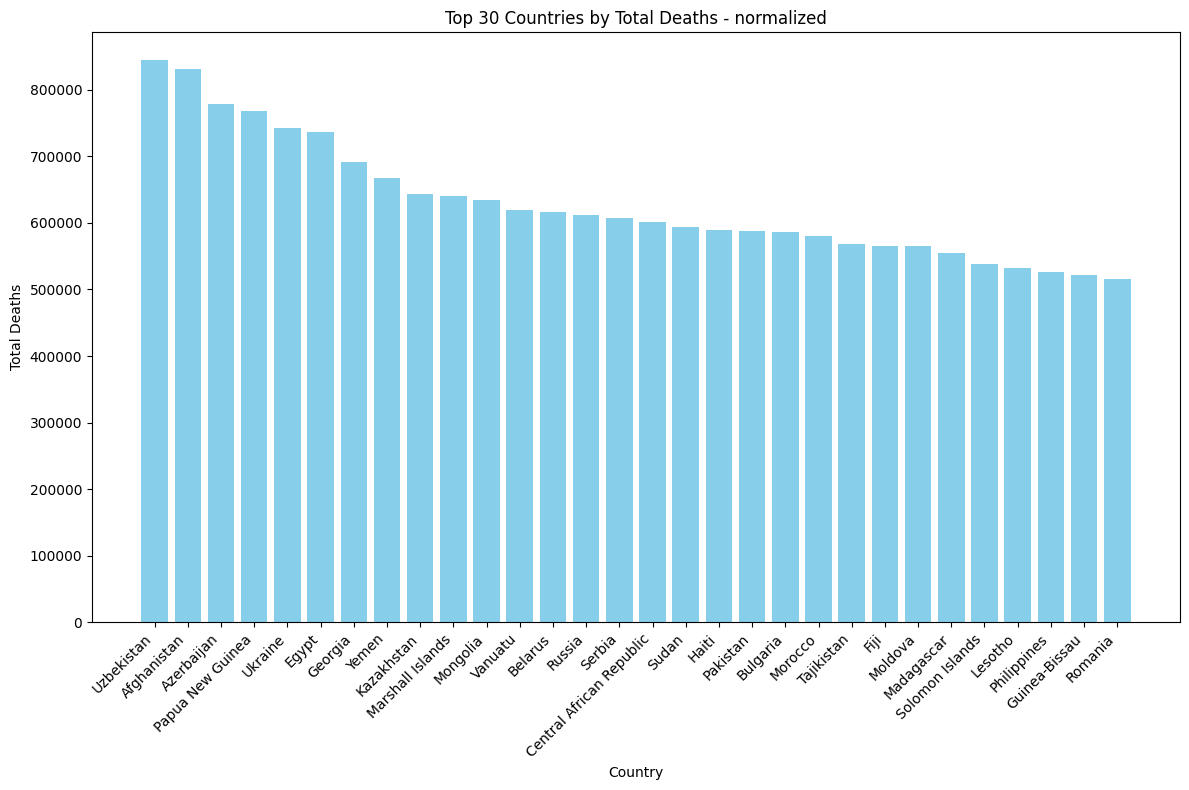

In [69]:
# Plot a bar chart for the top 30 countries
plt.figure(figsize=(12, 8))
plt.bar(top_30_countries['location'], top_30_countries['cardiovasc_death_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 30 Countries by Total Deaths - normalized')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [ ]:
# I dont need the values related to Continents, therefor I filter themvalues_to_exclude = ['Country_B']

In [70]:
values_to_exclude = ['World', 'High income', 'Upper middle income', 'Europe', 'North America', 'Asia', 'South America', 'Lower middle income', 'European Union']
df_filtered = df[~df['location'].isin(values_to_exclude)]

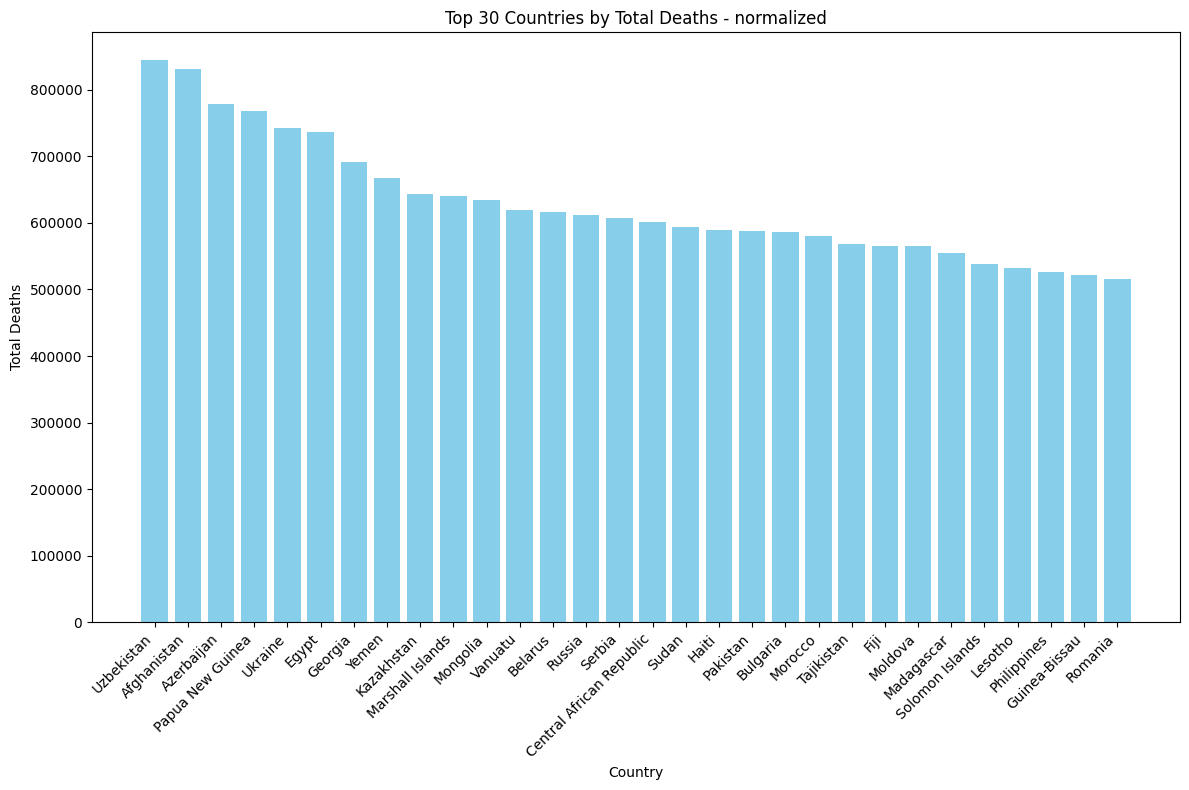

In [71]:
# Group by country and calculate the total deaths for each country
total_deaths_by_country = df_filtered.groupby('location')['cardiovasc_death_rate'].sum().reset_index()
# Sort the DataFrame by total deaths in descending order for better comparison
total_deaths_by_country = total_deaths_by_country.sort_values(by='cardiovasc_death_rate', ascending=False)
# Select the top 30 countries
top_30_countries = total_deaths_by_country.head(30)
# Plot a bar chart for the top 30 countries
plt.figure(figsize=(12, 8))
plt.bar(top_30_countries['location'], top_30_countries['cardiovasc_death_rate'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Deaths')
plt.title('Top 30 Countries by Total Deaths - normalized')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better display
plt.show()

In [ ]:
# top 10 countries with more new recent deathas

In [ ]:
# first remove the missing values from new_deaths

In [72]:
df.dropna(subset=['new_deaths'], inplace=True)

C:\Users\ms\AppData\Local\Temp\ipykernel_2088\4214342655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['new_deaths'], inplace=True)


In [73]:
values_to_exclude = ['World', 'High income', 'Upper middle income', 'Europe', 'North America', 'Asia', 'South America', 'Lower middle income', 'European Union']
df_filtered = df[~df['location'].isin(values_to_exclude)]
df_filtered = df_filtered[df_filtered['new_deaths'] > 0]

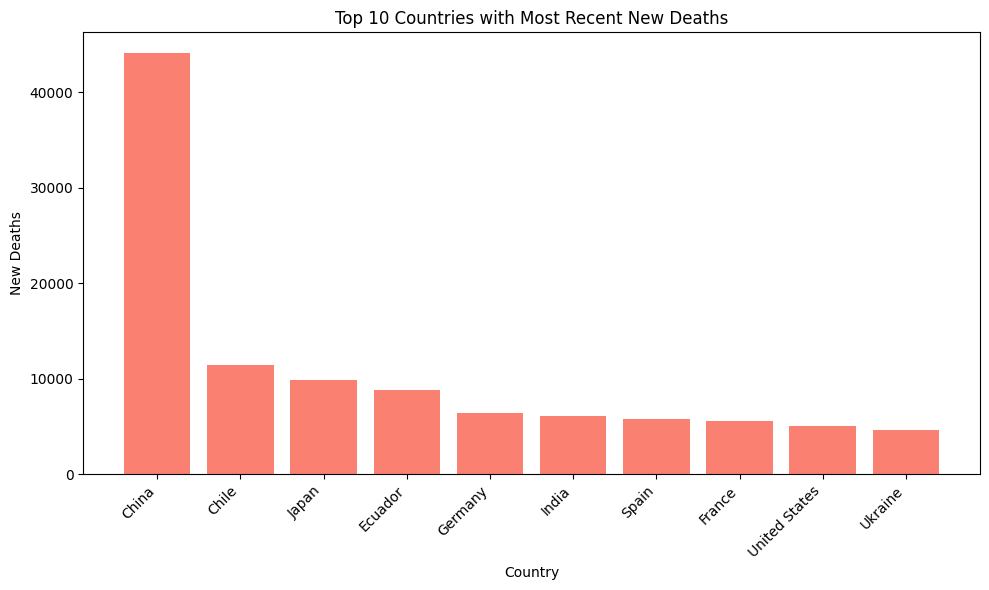

In [76]:
'''# Sort the DataFrame by date and 'new_deaths' column in descending order
unique_df = df_filtered.drop_duplicates(subset=['date', 'new_deaths'], keep='first')
sorted_df = unique_df.sort_values(by=['date', 'new_deaths'], ascending=[False, False])

# Select the top 10 rows
top_10_countries = sorted_df.head(10)'''

# new approach: sort just by new_deaths and extract the contries with more new_deaths, 
# sorting by date doesnt result in 10 or more, since for a certain date (last_date) there is just data for 4 countries

sorted_df = df_filtered.sort_values(by='new_deaths', ascending=False)
unique_values_df = sorted_df.drop_duplicates(subset='location')
top_10_countries = unique_values_df.head(10)


# Plot a bar chart for the top 10 countries with the most recent new deaths
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['location'], top_10_countries['new_deaths'], color='salmon')
plt.xlabel('Country')
plt.ylabel('New Deaths')
plt.title('Top 10 Countries with Most Recent New Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# compare between total_cases and total_deaths in different countries

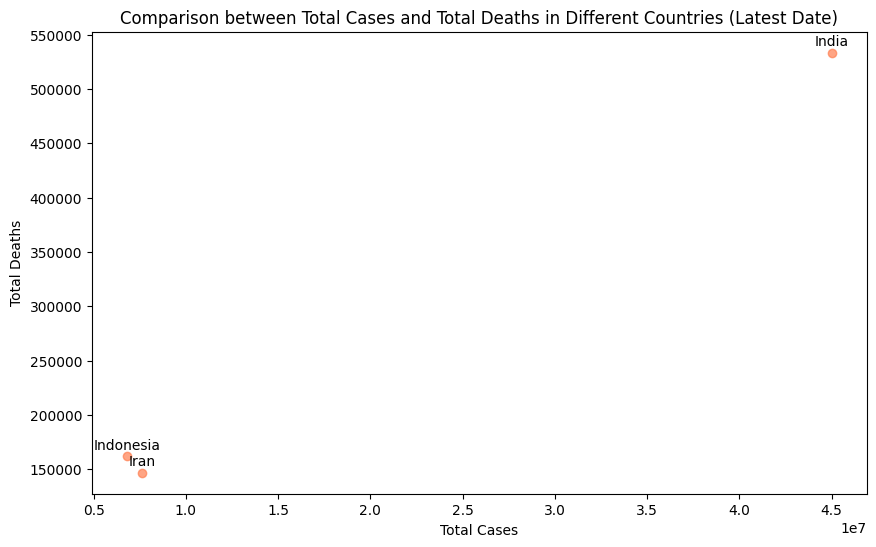

In [125]:
# Select the latest date for the scatter plot
latest_date = df_filtered['date'].max()
latest_data = df_filtered[df_filtered['date'] == latest_date]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(latest_data['total_cases'], latest_data['total_deaths'], color='coral', alpha=0.7)
plt.title('Comparison between Total Cases and Total Deaths in Different Countries (Latest Date)')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

# Annotate each point with the country name
for i, country in enumerate(latest_data['location']):
    plt.annotate(country, (latest_data['total_cases'].iloc[i], latest_data['total_deaths'].iloc[i]),
                 textcoords="offset points", xytext=(0,5), ha='center')

plt.show()


In [129]:
# there is not enough data for the last date 17.12.2023, therefor we use a certain date

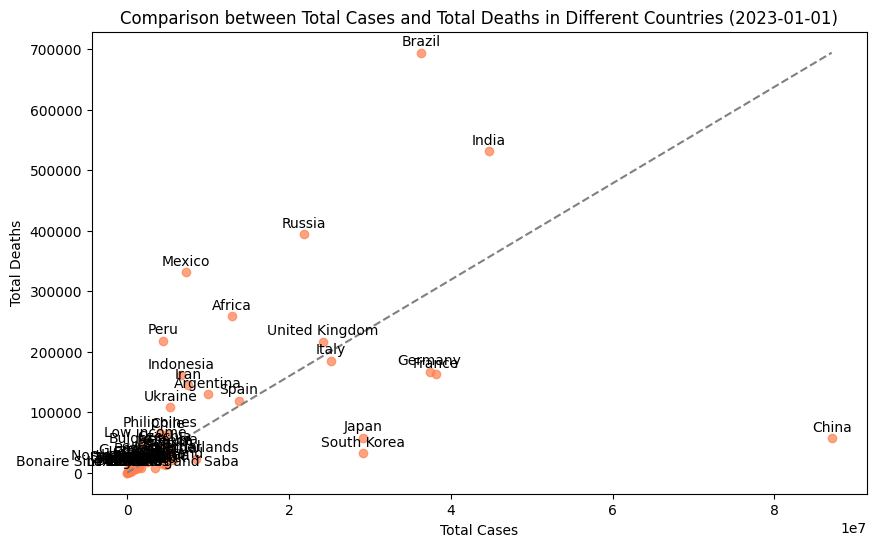

In [132]:
# Specify the target date for the scatter plot
target_date = '2023-01-01'

# Filter the DataFrame for the target date
target_data = df_filtered[df_filtered['date'] == target_date]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(target_data['total_cases'], target_data['total_deaths'], color='coral', alpha=0.7)

# Add a diagonal line representing a one-to-one relationship
plt.plot([0, target_data['total_cases'].max()], [0, target_data['total_deaths'].max()], color='gray', linestyle='--')

plt.title(f'Comparison between Total Cases and Total Deaths in Different Countries ({target_date})')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')

# Annotate each point with the country name
for i, country in enumerate(target_data['location']):
    plt.annotate(country, (target_data['total_cases'].iloc[i], target_data['total_deaths'].iloc[i]),
                 textcoords="offset points", xytext=(0, 5), ha='center')

plt.show()


In [131]:
# By examining the scatter plot, we can interpret the relationship between total cases and total deaths for different countries
# on the specified date. For example, we can identify countries with higher total cases and observe whether there is a corresponding 
# increase in total deaths.

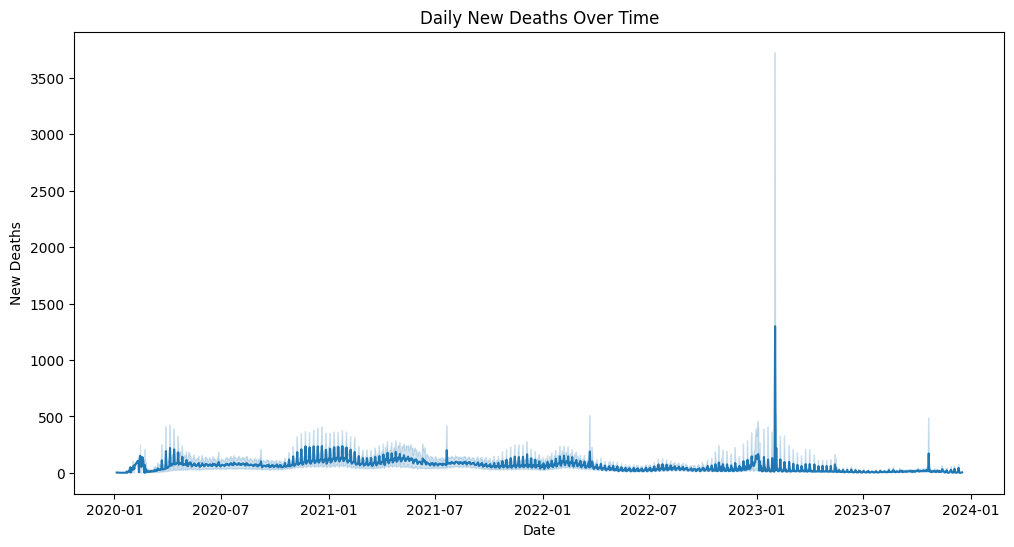

In [83]:
# Plot daily new deaths over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='new_deaths', data=df_filtered)
plt.title('Daily New Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()

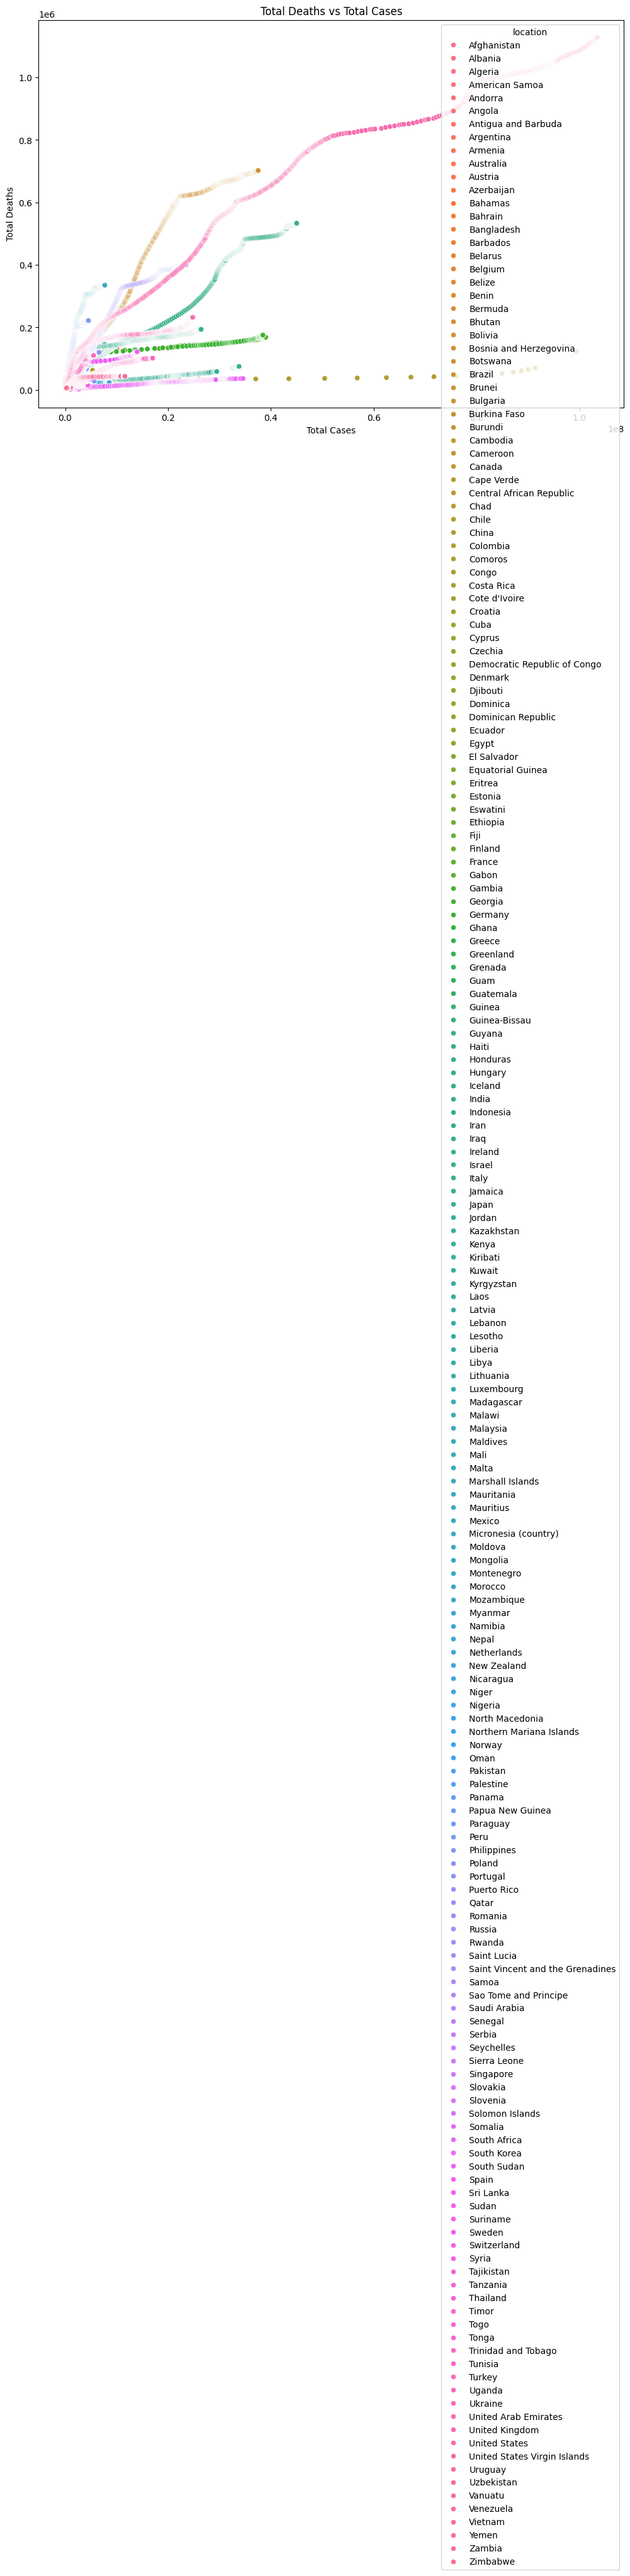

In [85]:
# Plot total deaths and total cases per country
plt.figure(figsize=(12, 8))
sns.scatterplot(x='total_cases', y='total_deaths', hue='location', data=df_filtered)
plt.title('Total Deaths vs Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Total Deaths')
plt.show()

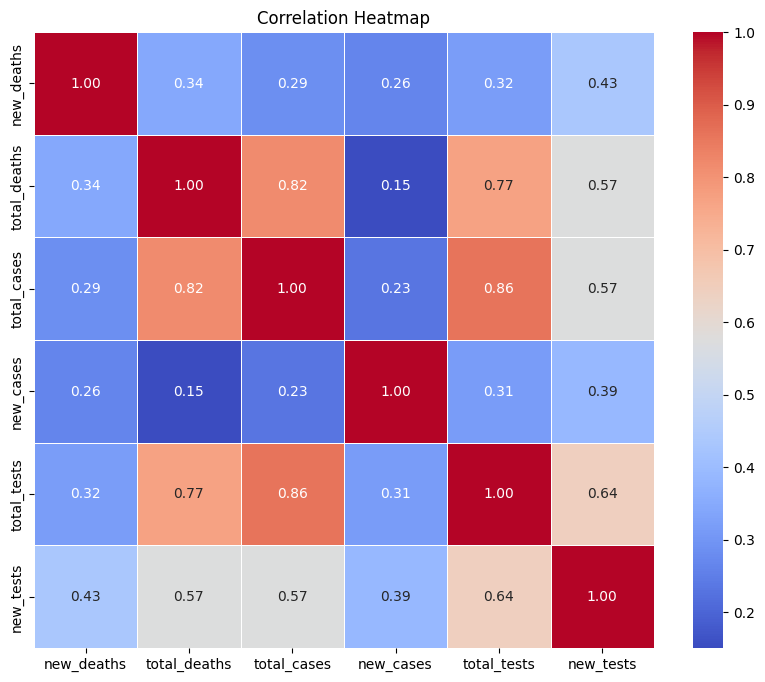

In [86]:
# Correlation heatmap
correlation_matrix = df_filtered[['new_deaths', 'total_deaths', 'total_cases', 'new_cases', 'total_tests', 'new_tests']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()